In [ ]:
                               BANK MARKETING TERM DEPOSIT PREDICTION

In [4]:
import pandas as p
import numpy as np

In [5]:
df=p.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

In [6]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [7]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [9]:
df.shape

(31647, 18)

In [10]:
df1=df.drop('ID',axis='columns')
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [11]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
for col in df1.select_dtypes(include='object').columns:
    print(col)
    print(df1[col].unique())

job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome
['unknown' 'success' 'failure' 'other']
subscribed
['no' 'yes']


# EDA

In [13]:
# finding the missing values
features_na=[features for features  in df1.columns if df1[features].isnull().sum()>0]
for feature in features_na:
    print(feature,np.round(df1[feature].isnull().mean(),4), '% missing values')
else:
    print('no missing values')

no missing values


In [14]:
# find features with one value
for column in df1.columns:
    print(column,df1[column].nunique())
    

age 76
job 12
marital 3
education 4
default 2
balance 6326
housing 2
loan 2
contact 3
day 31
month 12
duration 1454
campaign 45
pdays 509
previous 38
poutcome 4
subscribed 2


# explore the categorical features

In [15]:
categorical_features =[feature for feature in df1.columns if ((df1[feature].dtypes=='O') & (feature not in ['subscribed']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [16]:
for feature in categorical_features:
    print('the features is {} and number of categories are {}'.format(feature,len(df1[feature].unique())))

the features is job and number of categories are 12
the features is marital and number of categories are 3
the features is education and number of categories are 4
the features is default and number of categories are 2
the features is housing and number of categories are 2
the features is loan and number of categories are 2
the features is contact and number of categories are 3
the features is month and number of categories are 12
the features is poutcome and number of categories are 4


# find categorical distribution

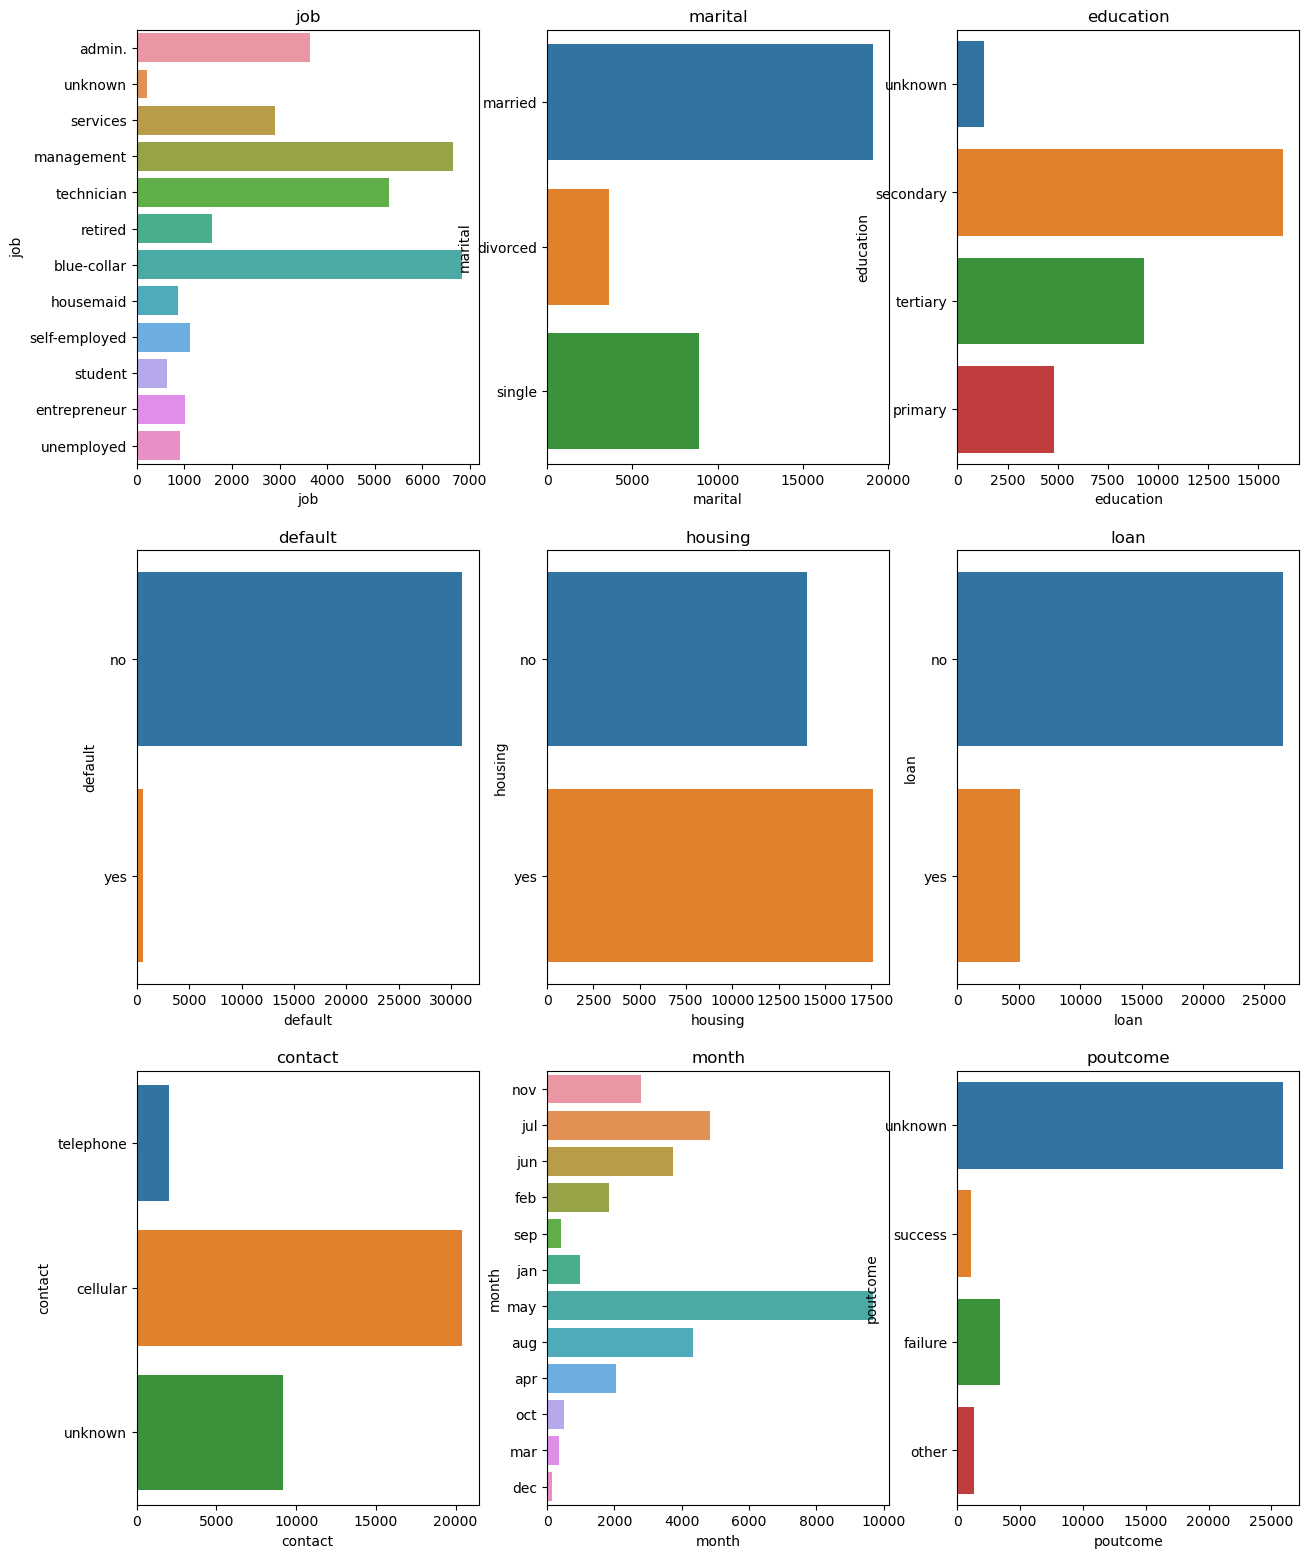

In [17]:
# check count based on categorical features 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,80),facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df1)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()    

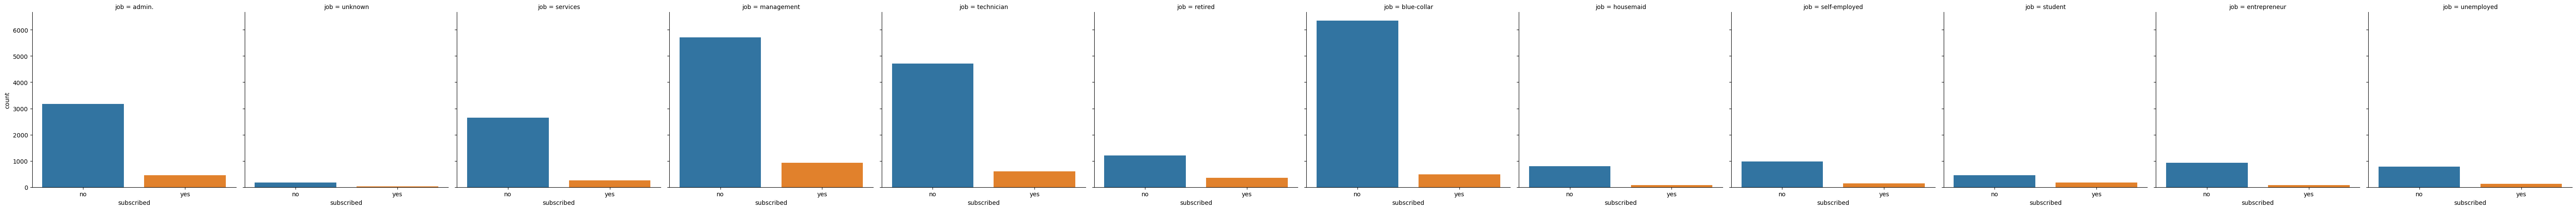

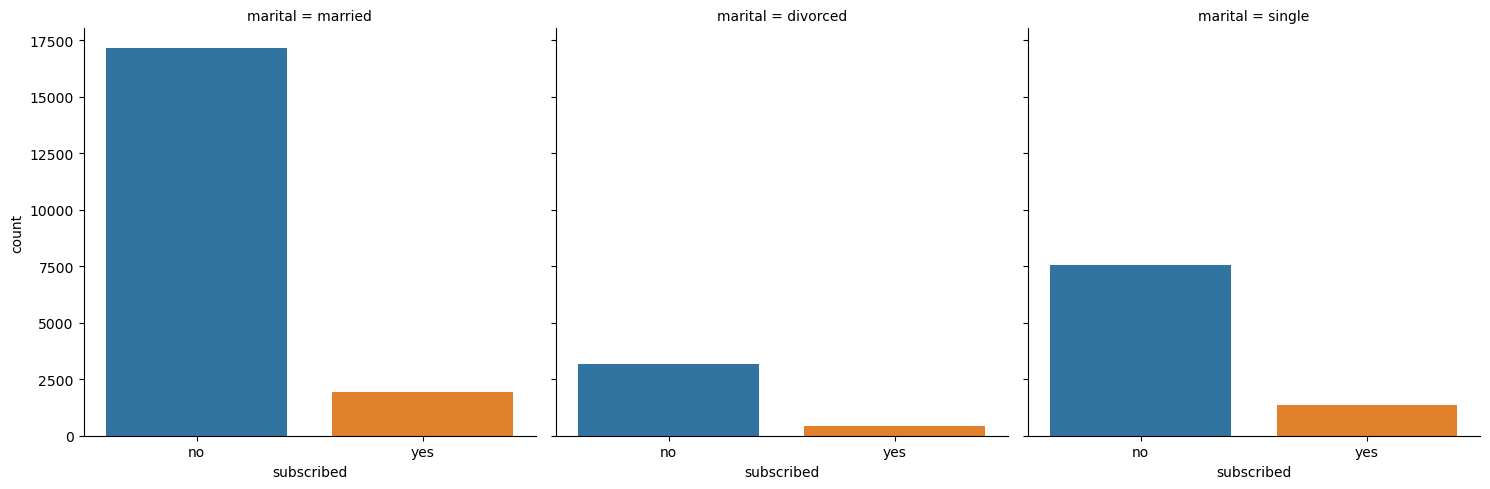

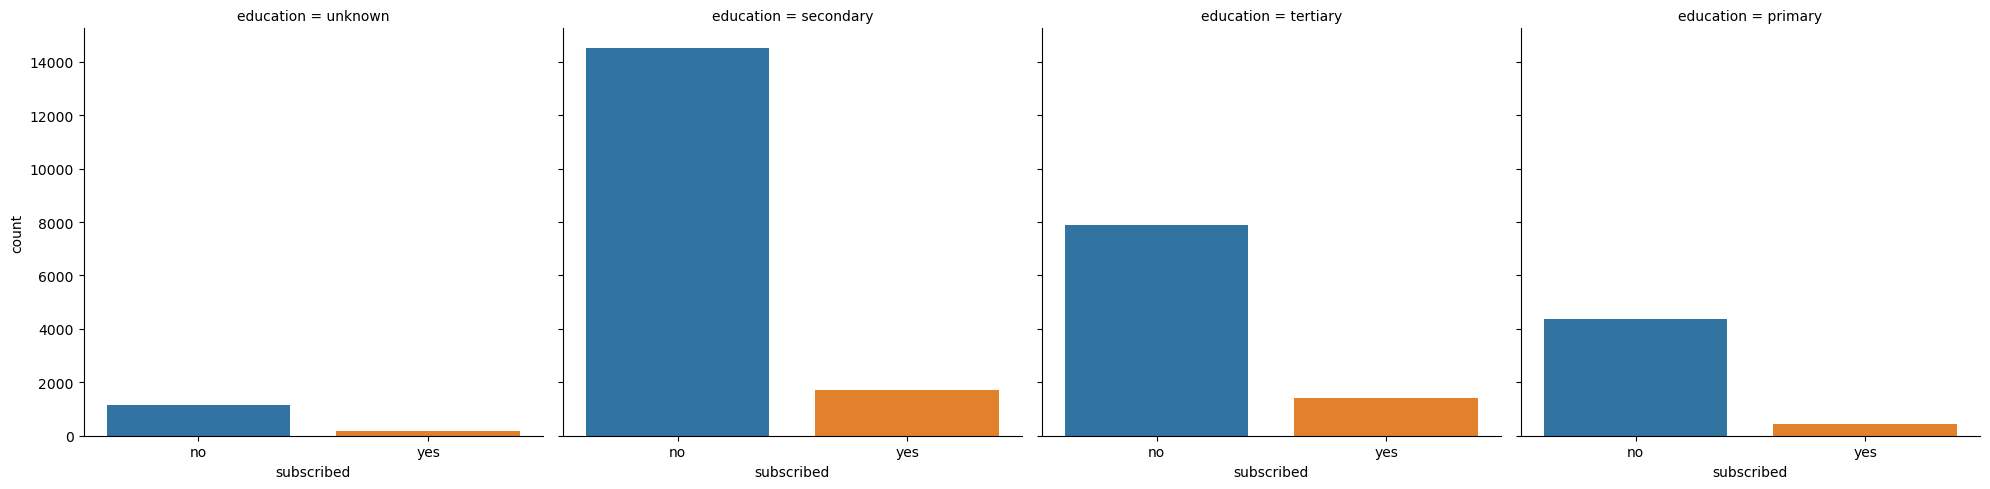

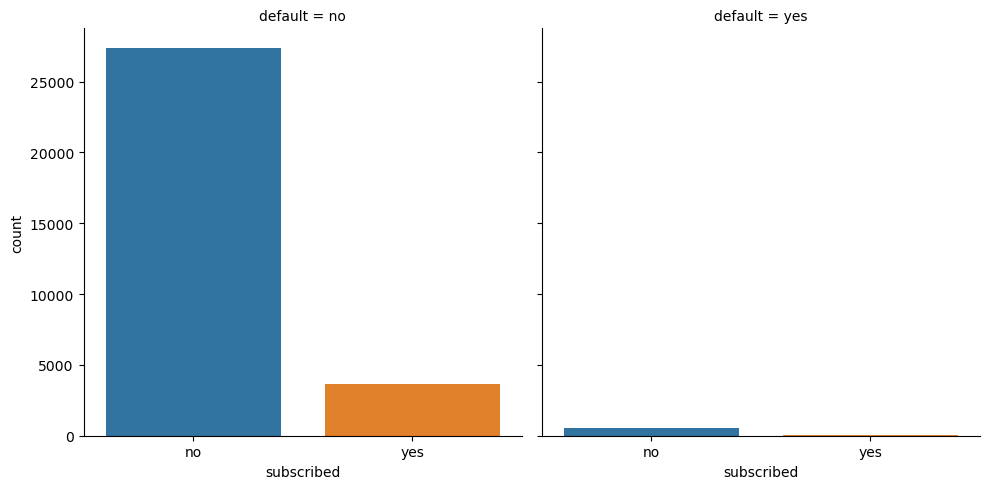

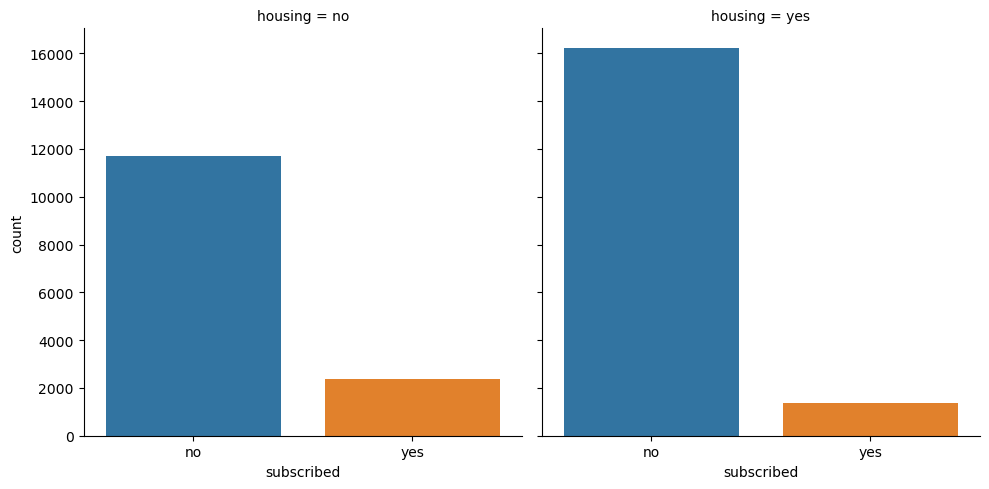

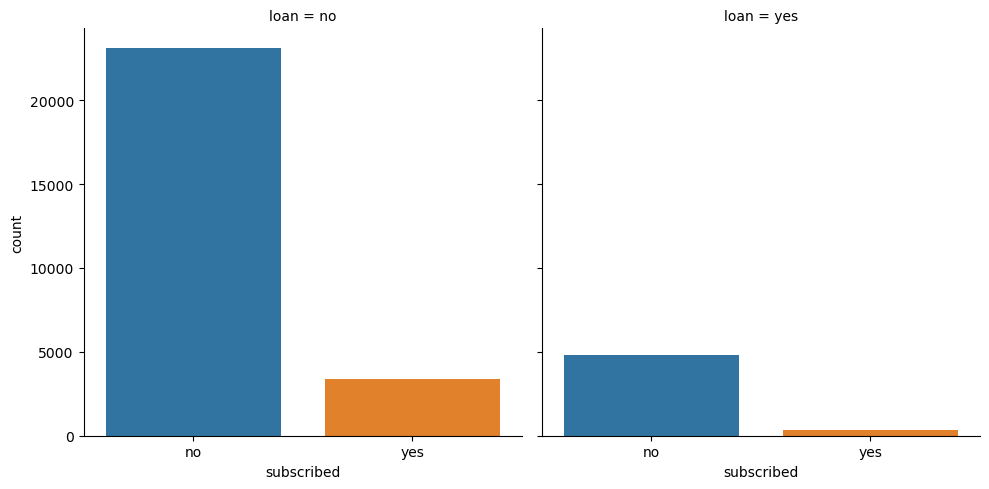

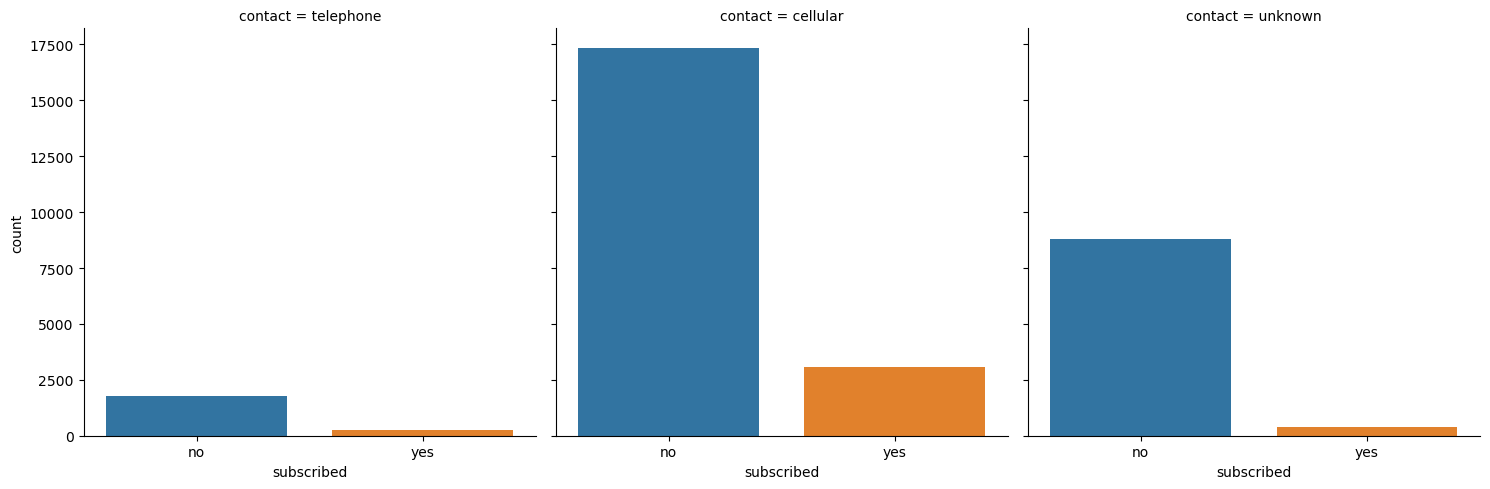

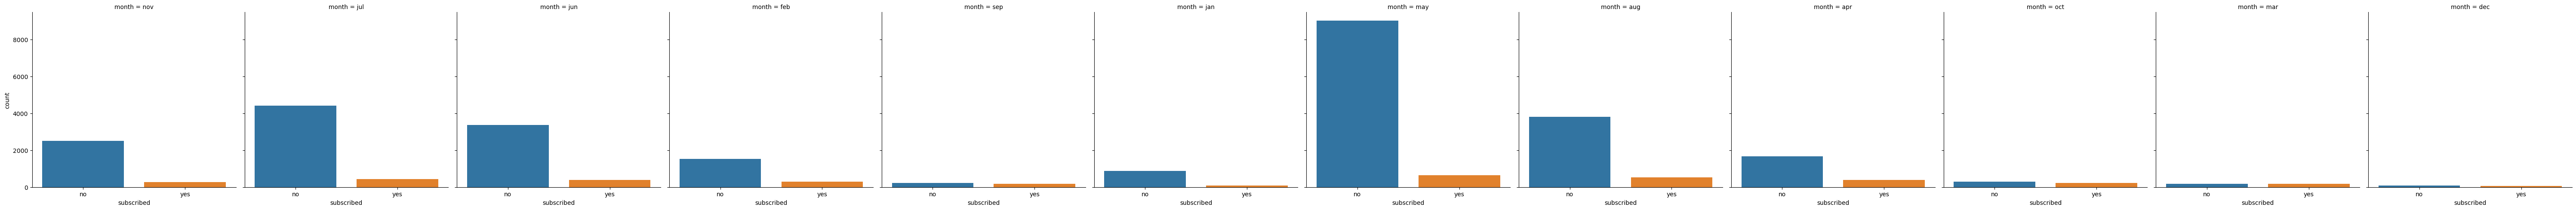

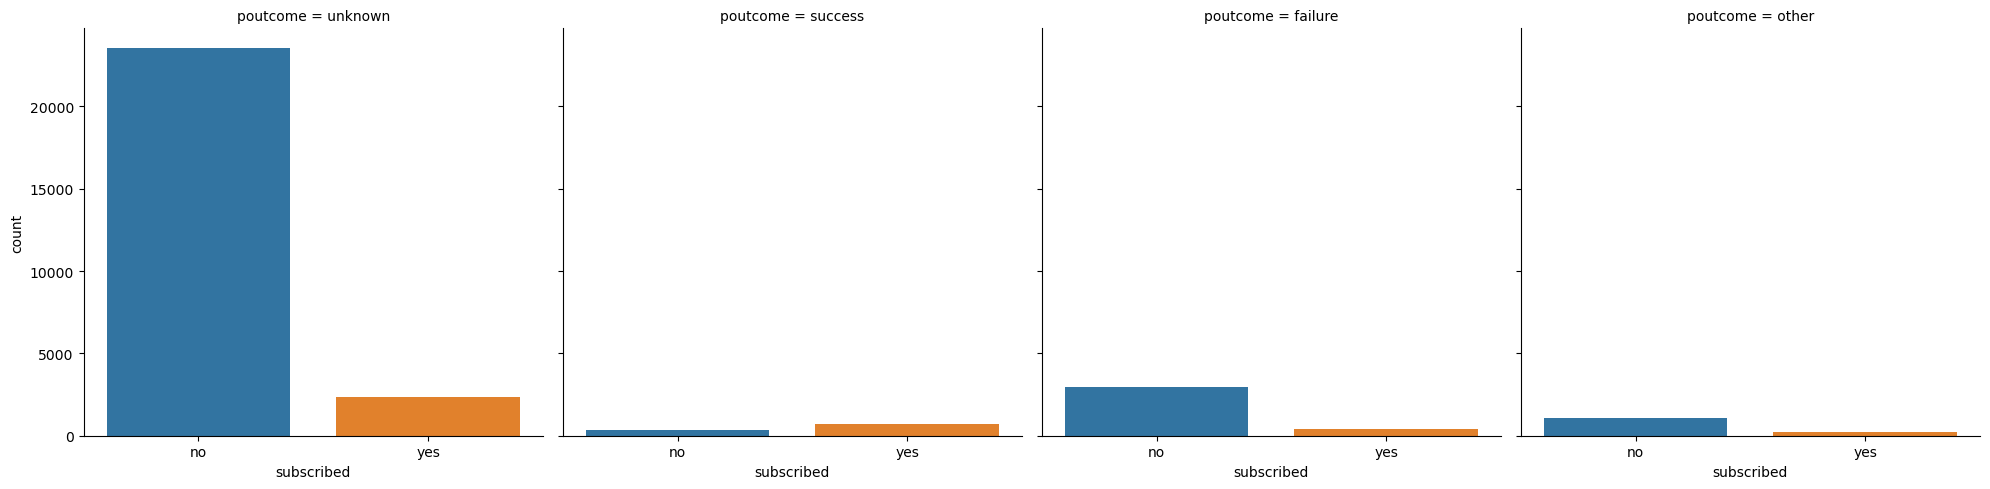

In [18]:
for categorical_feature in categorical_features:
    sns.catplot(x='subscribed',col=categorical_feature,kind='count',data=df1)
plt.show()    

In [19]:
# check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df1.groupby(['subscribed',categorical_feature]).size())

subscribed  job          
no          admin.           3179
            blue-collar      6353
            entrepreneur      923
            housemaid         795
            management       5716
            retired          1212
            self-employed     983
            services         2649
            student           453
            technician       4713
            unemployed        776
            unknown           180
yes         admin.            452
            blue-collar       489
            entrepreneur       85
            housemaid          79
            management        923
            retired           362
            self-employed     140
            services          254
            student           182
            technician        594
            unemployed        129
            unknown            26
dtype: int64
subscribed  marital 
no          divorced     3185
            married     17176
            single       7571
yes         divorced      445
    

# explore the numerical features 

In [20]:
num_features=[feature for feature in df1.columns if ((df1[feature].dtypes!='O')& (feature not in ['subscribed']))]
num_features
df1[num_features].head()

,age,balance,day,duration,campaign,pdays,previous
0,56,1933,19,44,2,-1,0
1,31,3,20,91,2,-1,0
2,27,891,18,240,1,-1,0
3,57,3287,22,867,1,84,3
4,31,119,4,380,1,-1,0


In [21]:
dis_feature=[feature for feature in num_features if len(df1[feature].unique())<25]
print('discrete variables count:{}'.format(len(dis_feature)))

discrete variables count:0


# find continous numerical features 

In [22]:
con_features=[feature for feature in num_features if feature not in dis_feature+['subscribed']]
print('continous features count:{}'.format(len(con_features)))

continous features count:7


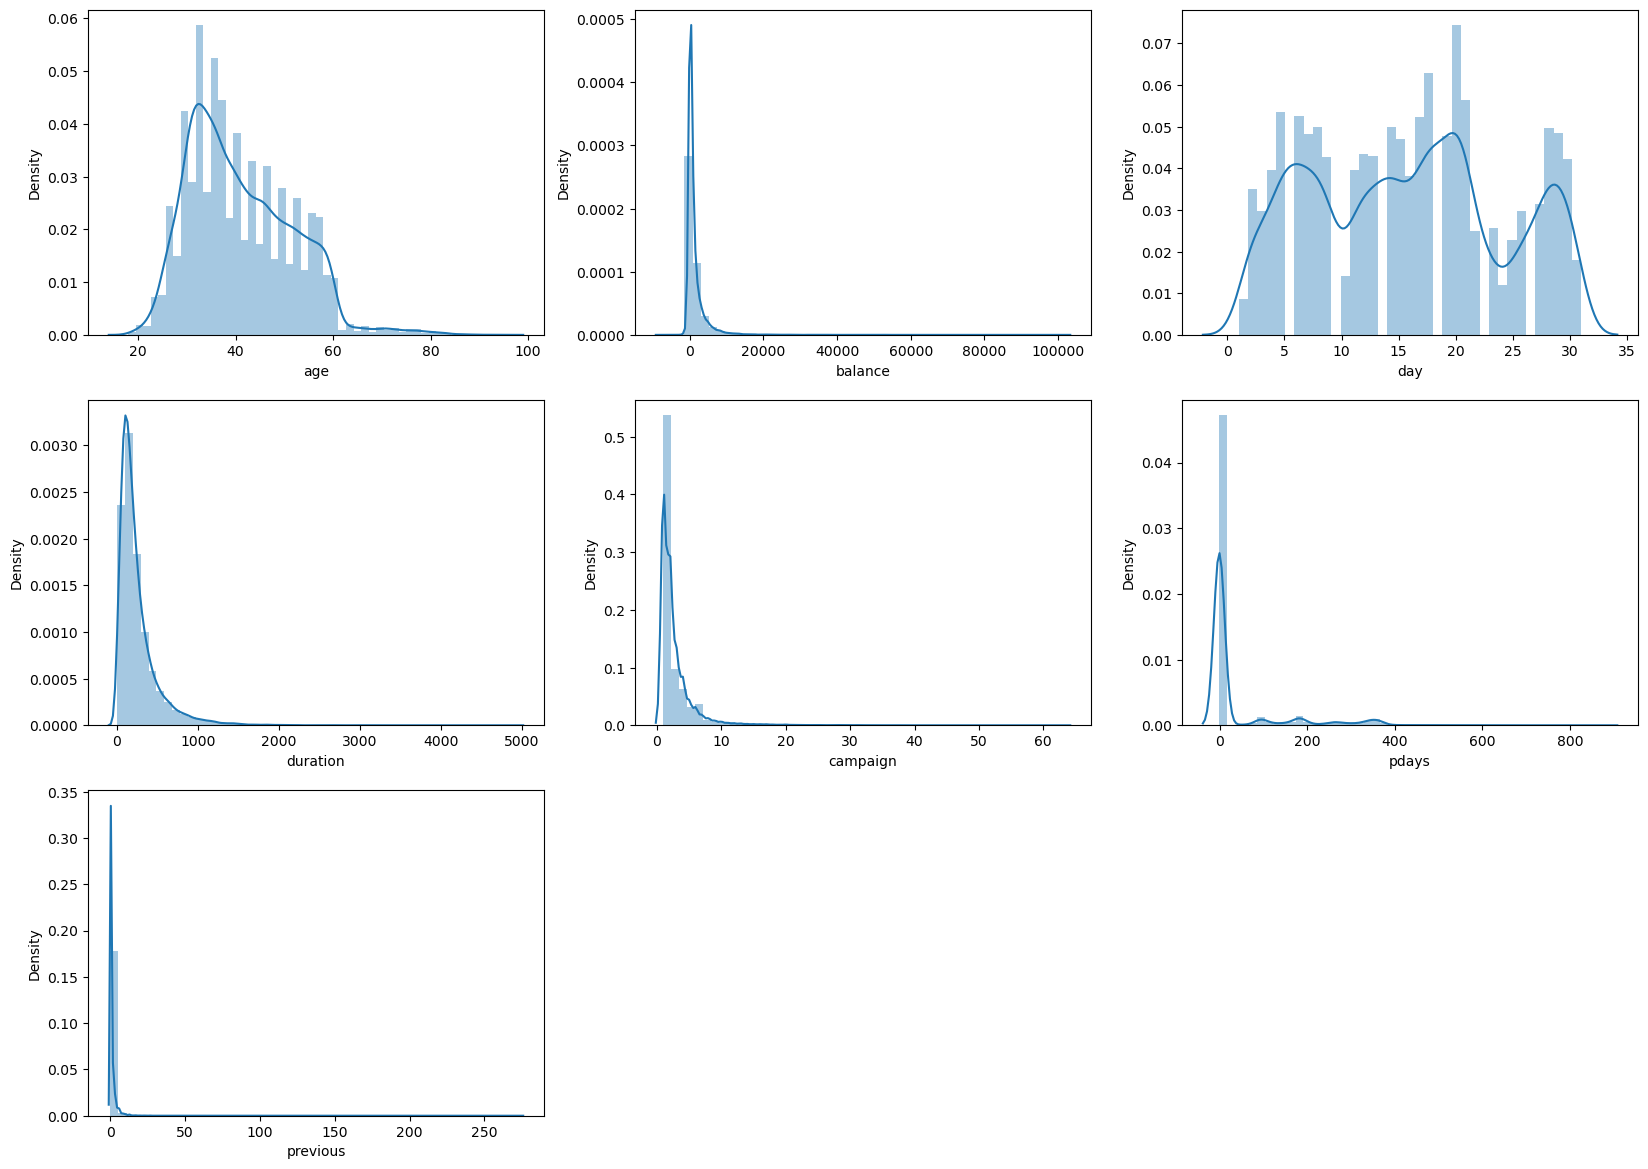

In [23]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for con_feature in con_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(df1[con_feature])
    plt.xlabel(con_feature)
    plotnumber+=1
plt.show()    

# relationship between continous numerical features and labels

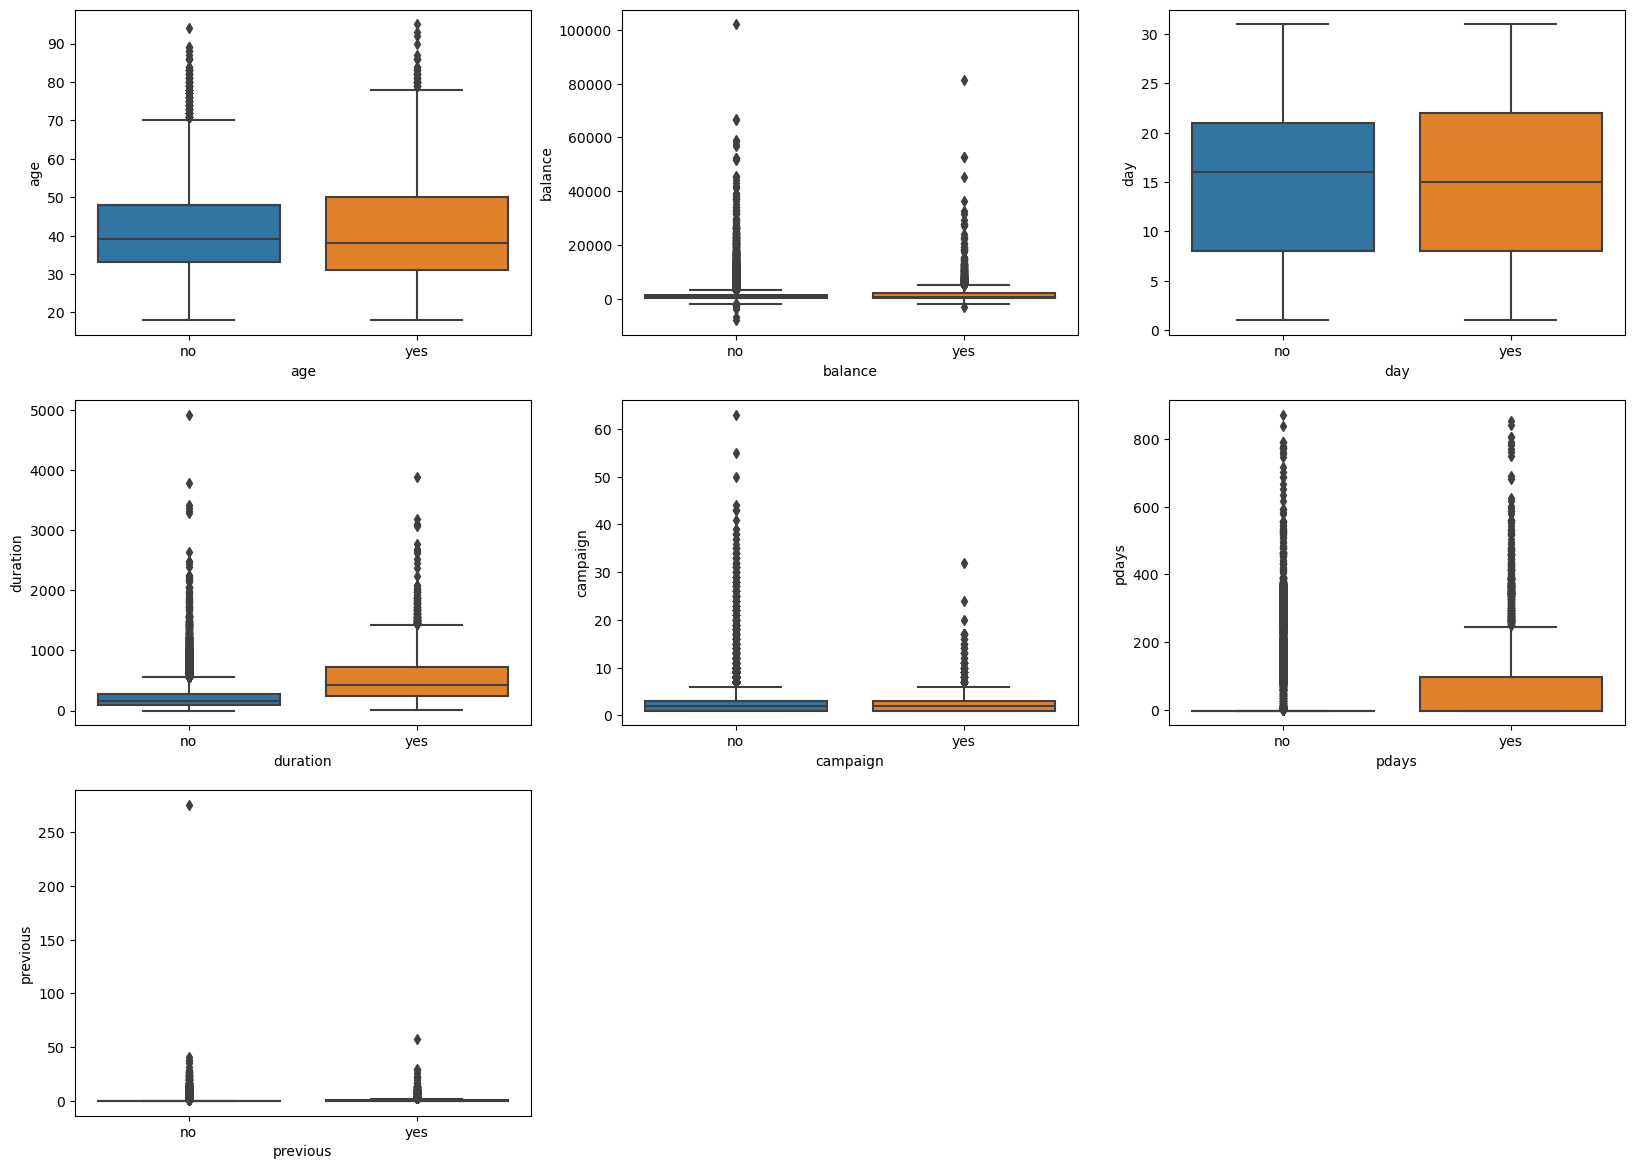

In [24]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for feature in con_features:
    ax=plt.subplot (12,3,plotnumber)
    sns.boxplot(x='subscribed',y=df1[feature],data=df1)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()    

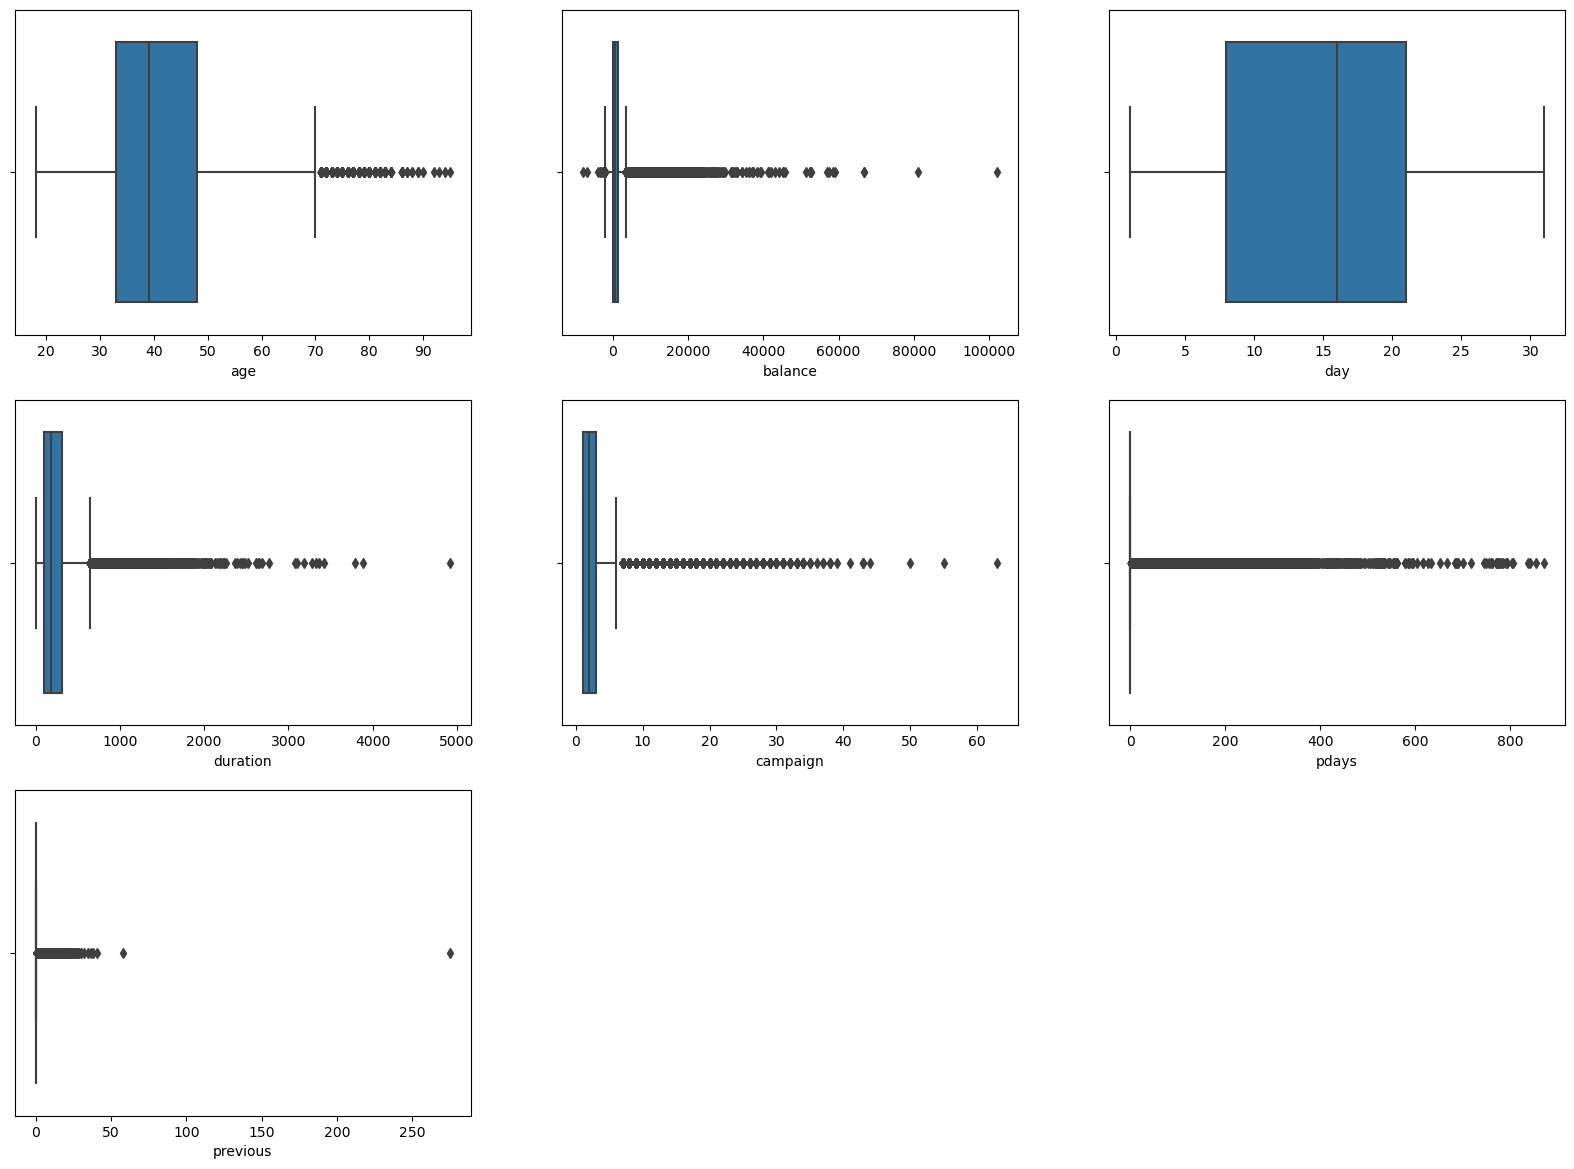

In [25]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for num_feature in num_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df1[num_feature])
    plt.xlabel(num_feature)
    plotnumber+=1
plt.show ()   

# explore the corelation between numerical features 

<AxesSubplot:>

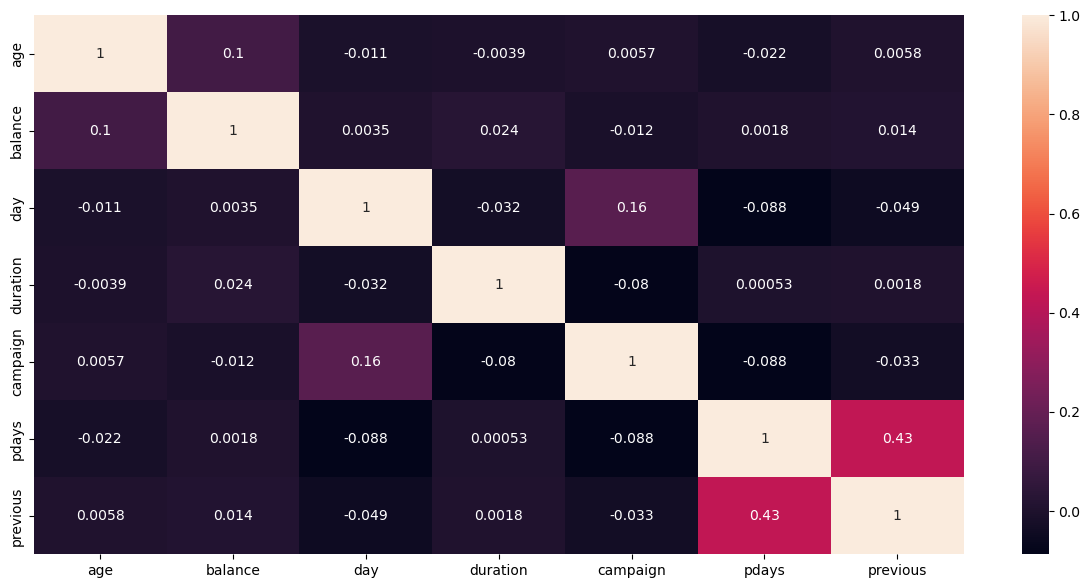

In [26]:
cor_mat=df1.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

checking the data is balance or not

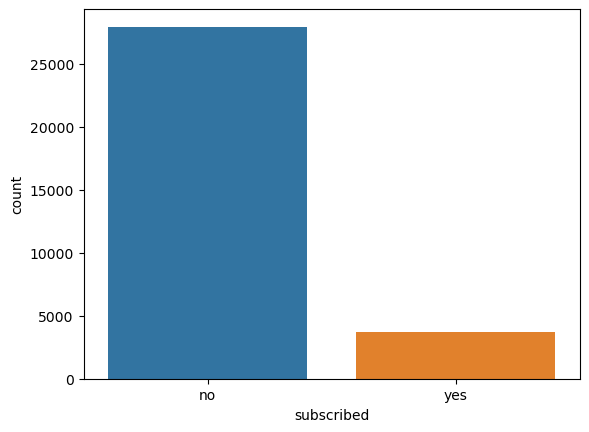

In [27]:
sns.countplot(x='subscribed',data=df1)
plt.show()

In [28]:
df1['subscribed'].groupby(df1['subscribed']).count()

subscribed
no     27932
yes     3715
Name: subscribed, dtype: int64

In [29]:
df2=df1.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [30]:
df2.shape

(31647, 17)

In [31]:
df2.groupby(['subscribed','default']).size()

subscribed  default
no          no         27388
            yes          544
yes         no          3674
            yes           41
dtype: int64

In [32]:
df2.drop(['default'],axis=1,inplace=True)

In [33]:
df2.groupby(['subscribed','pdays']).size()

subscribed  pdays
no          -1       23553
             1           6
             2          24
             4           1
             5           7
                     ...  
yes          792         1
             804         1
             805         1
             842         1
             854         1
Length: 804, dtype: int64

In [34]:
df2.groupby('age',sort=True)['age'].count()

age
18     8
19    22
20    39
21    48
22    86
      ..
90     1
92     1
93     1
94     1
95     1
Name: age, Length: 76, dtype: int64

In [35]:
df2.groupby(['subscribed','balance'],sort=True)['balance'].count()

subscribed  balance
no          -8019      1
            -6847      1
            -4057      1
            -3372      1
            -2712      1
                      ..
yes          32685     1
             36252     1
             45248     1
             52587     2
             81204     1
Name: balance, Length: 7969, dtype: int64

In [36]:
df2.groupby(['subscribed','duration'],sort=True)['duration'].count()

subscribed  duration
no          0            1
            2            3
            3            3
            4           11
            5           20
                        ..
yes         2775         1
            3076         1
            3102         1
            3183         1
            3881         1
Name: duration, Length: 2381, dtype: int64

In [37]:
df2.groupby(['subscribed','campaign'],sort=True)['campaign'].count()

subscribed  campaign
no          1           10486
            2            7792
            3            3439
            4            2213
            5            1147
                        ...  
yes         16              2
            17              6
            20              1
            24              1
            32              1
Name: campaign, Length: 65, dtype: int64

In [38]:
df3=df2[df2['campaign']<33]

In [39]:
df3.groupby(['subscribed','campaign'],sort=True)['campaign'].count()

subscribed  campaign
no          1           10486
            2            7792
            3            3439
            4            2213
            5            1147
            6             845
            7             484
            8             335
            9             221
            10            173
            11            115
            12            100
            13             88
            14             65
            15             58
            16             52
            17             46
            18             37
            19             30
            20             36
            21             19
            22             18
            23             13
            24             12
            25             17
            26              9
            27              8
            28             14
            29             12
            30              6
            31              9
            32              5
yes         1      

In [40]:
df3.groupby(['subscribed','previous'],sort=True)['previous'].count()

subscribed  previous
no          0           23525
            1            1499
            2            1154
            3             580
            4             382
            5             227
            6             128
            7             102
            8              56
            9              46
            10             33
            11             38
            12             25
            13             22
            14              9
            15             15
            16              8
            17              8
            18              5
            19              7
            20              5
            21              3
            22              3
            23              5
            24              2
            25              4
            26              1
            27              4
            28              1
            29              1
            32              1
            35              1
            37     

In [41]:
df4=df3[df3['previous']<31]

In [42]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = p.concat([df4.drop(col, axis=1),p.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [43]:
bool_columns = ['housing', 'loan', 'subscribed']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [44]:
df4.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,subscribed_new
0,56,1933,19,44,2,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,31,3,20,91,2,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,27,891,18,240,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,57,3287,22,867,1,84,3,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,31,119,4,380,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


# Split Dataset into Training set and Test set

In [45]:
X = df4.drop(['subscribed_new'],axis=1)
y = df4['subscribed_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [46]:
len(X_train)

25289

In [47]:
len(X_test)


6323

In [51]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 2.4 MB/s eta 0:00:00


In [52]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.90154211 0.90806643 0.89976275 0.89976275 0.90330235]
0.9024872796501848


In [53]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.90351918 0.90865955 0.8981811  0.9013444  0.90251137]
0.9028431202598014


In [54]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [55]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [56]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
model_xgb.score(X_test,y_test)

0.9114344456745216

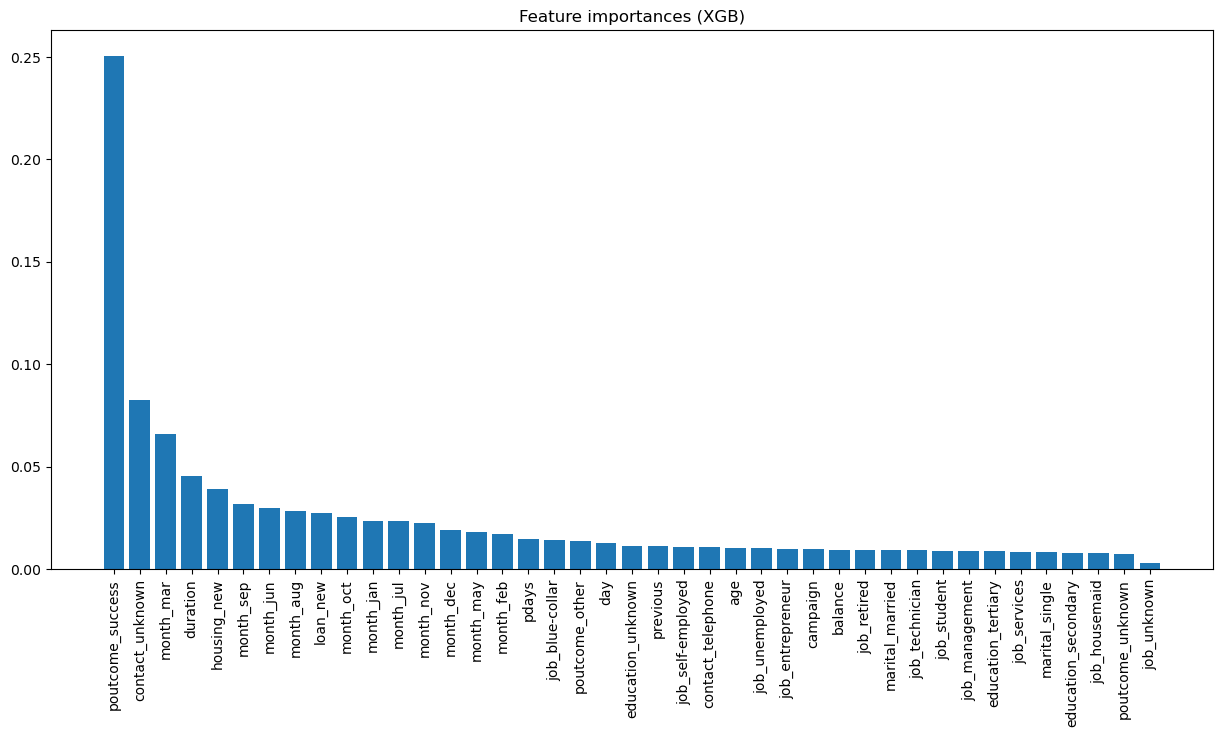

In [58]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = p.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [59]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[5404,  198],
       [ 362,  359]], dtype=int64)

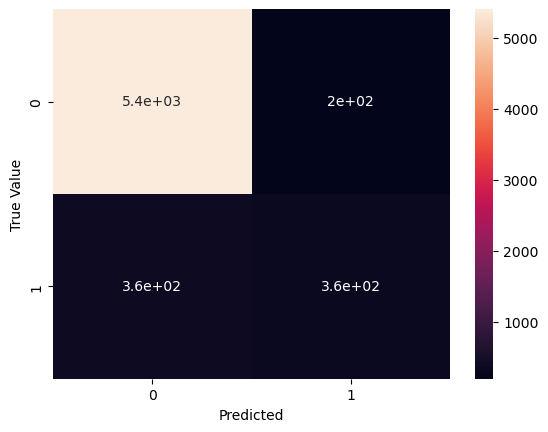

In [60]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()